In [2]:
import scanpy as sc
import pandas as pd 
import numpy as np 

In [3]:

df=pd.read_csv('day7_query/MNN_based_annotations/3_nico_annotation_cluster.csv')
cluster=df.to_numpy()
df=pd.read_csv('day7_query/MNN_based_annotations/3_nico_annotation_ct_name.csv')
ctname=df.to_numpy()


In [5]:
adata= sc.read_h5ad('day7_query/sct_spatial.h5ad')
adata

AnnData object with n_obs × n_vars = 29629 × 421
    obs: 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct', 'leiden0.1', 'leiden0.2', 'leiden0.3', 'leiden0.4', 'leiden0.5', 'leiden0.6', 'coord_x', 'coord_y', 'batch'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
    uns: 'leiden', 'leiden0.5_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
np.array_equal(adata.obs_names, cluster[:,0])

True

In [8]:
cluster[0:3]

array([['cell1', 21],
       ['cell7', 9],
       ['cell10', 9]], dtype=object)

In [10]:
d={}
for i in range(len(ctname)):
    d[ctname[i,0]]=ctname[i,1]

ct=[]
for i in range(len(cluster)):
    ct.append(d[cluster[i,1]])

In [11]:
adata.obs['nico_cluster']=ct 



In [ ]:
#ad_sp1.obs['coord_x']=coordinate1[:,1].astype(str)

In [13]:
adata.obs['nico_cluster']

cell1                 NM
cell7          EC_merged
cell10         EC_merged
cell13         EC_merged
cell14         EC_merged
                ...     
cell38836             NM
cell38837             NM
cell38838    Fibroblasts
cell38840             NK
cell38843             NM
Name: nico_cluster, Length: 29629, dtype: object

/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


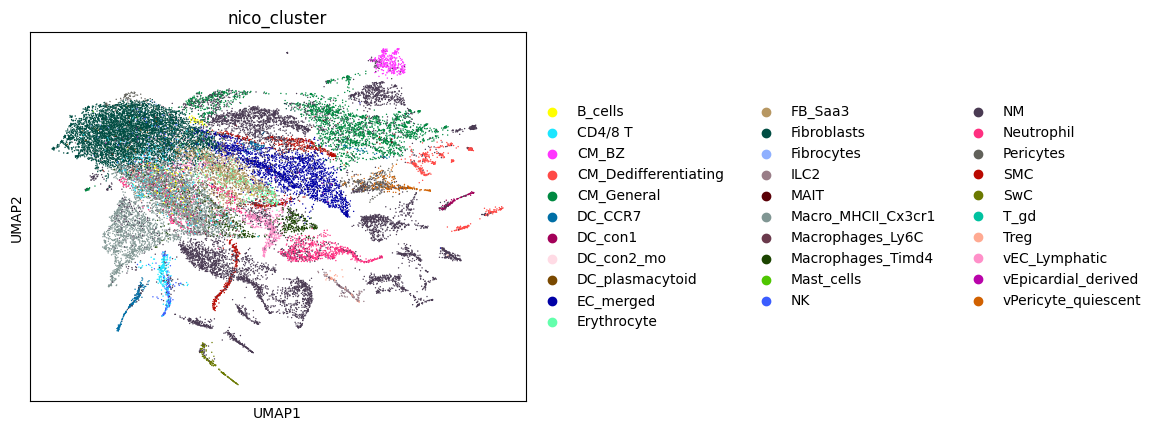

In [14]:
sc.pl.umap(adata, color=["nico_cluster"], wspace=0.4,show=True, save='leiden.png')

/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame is h

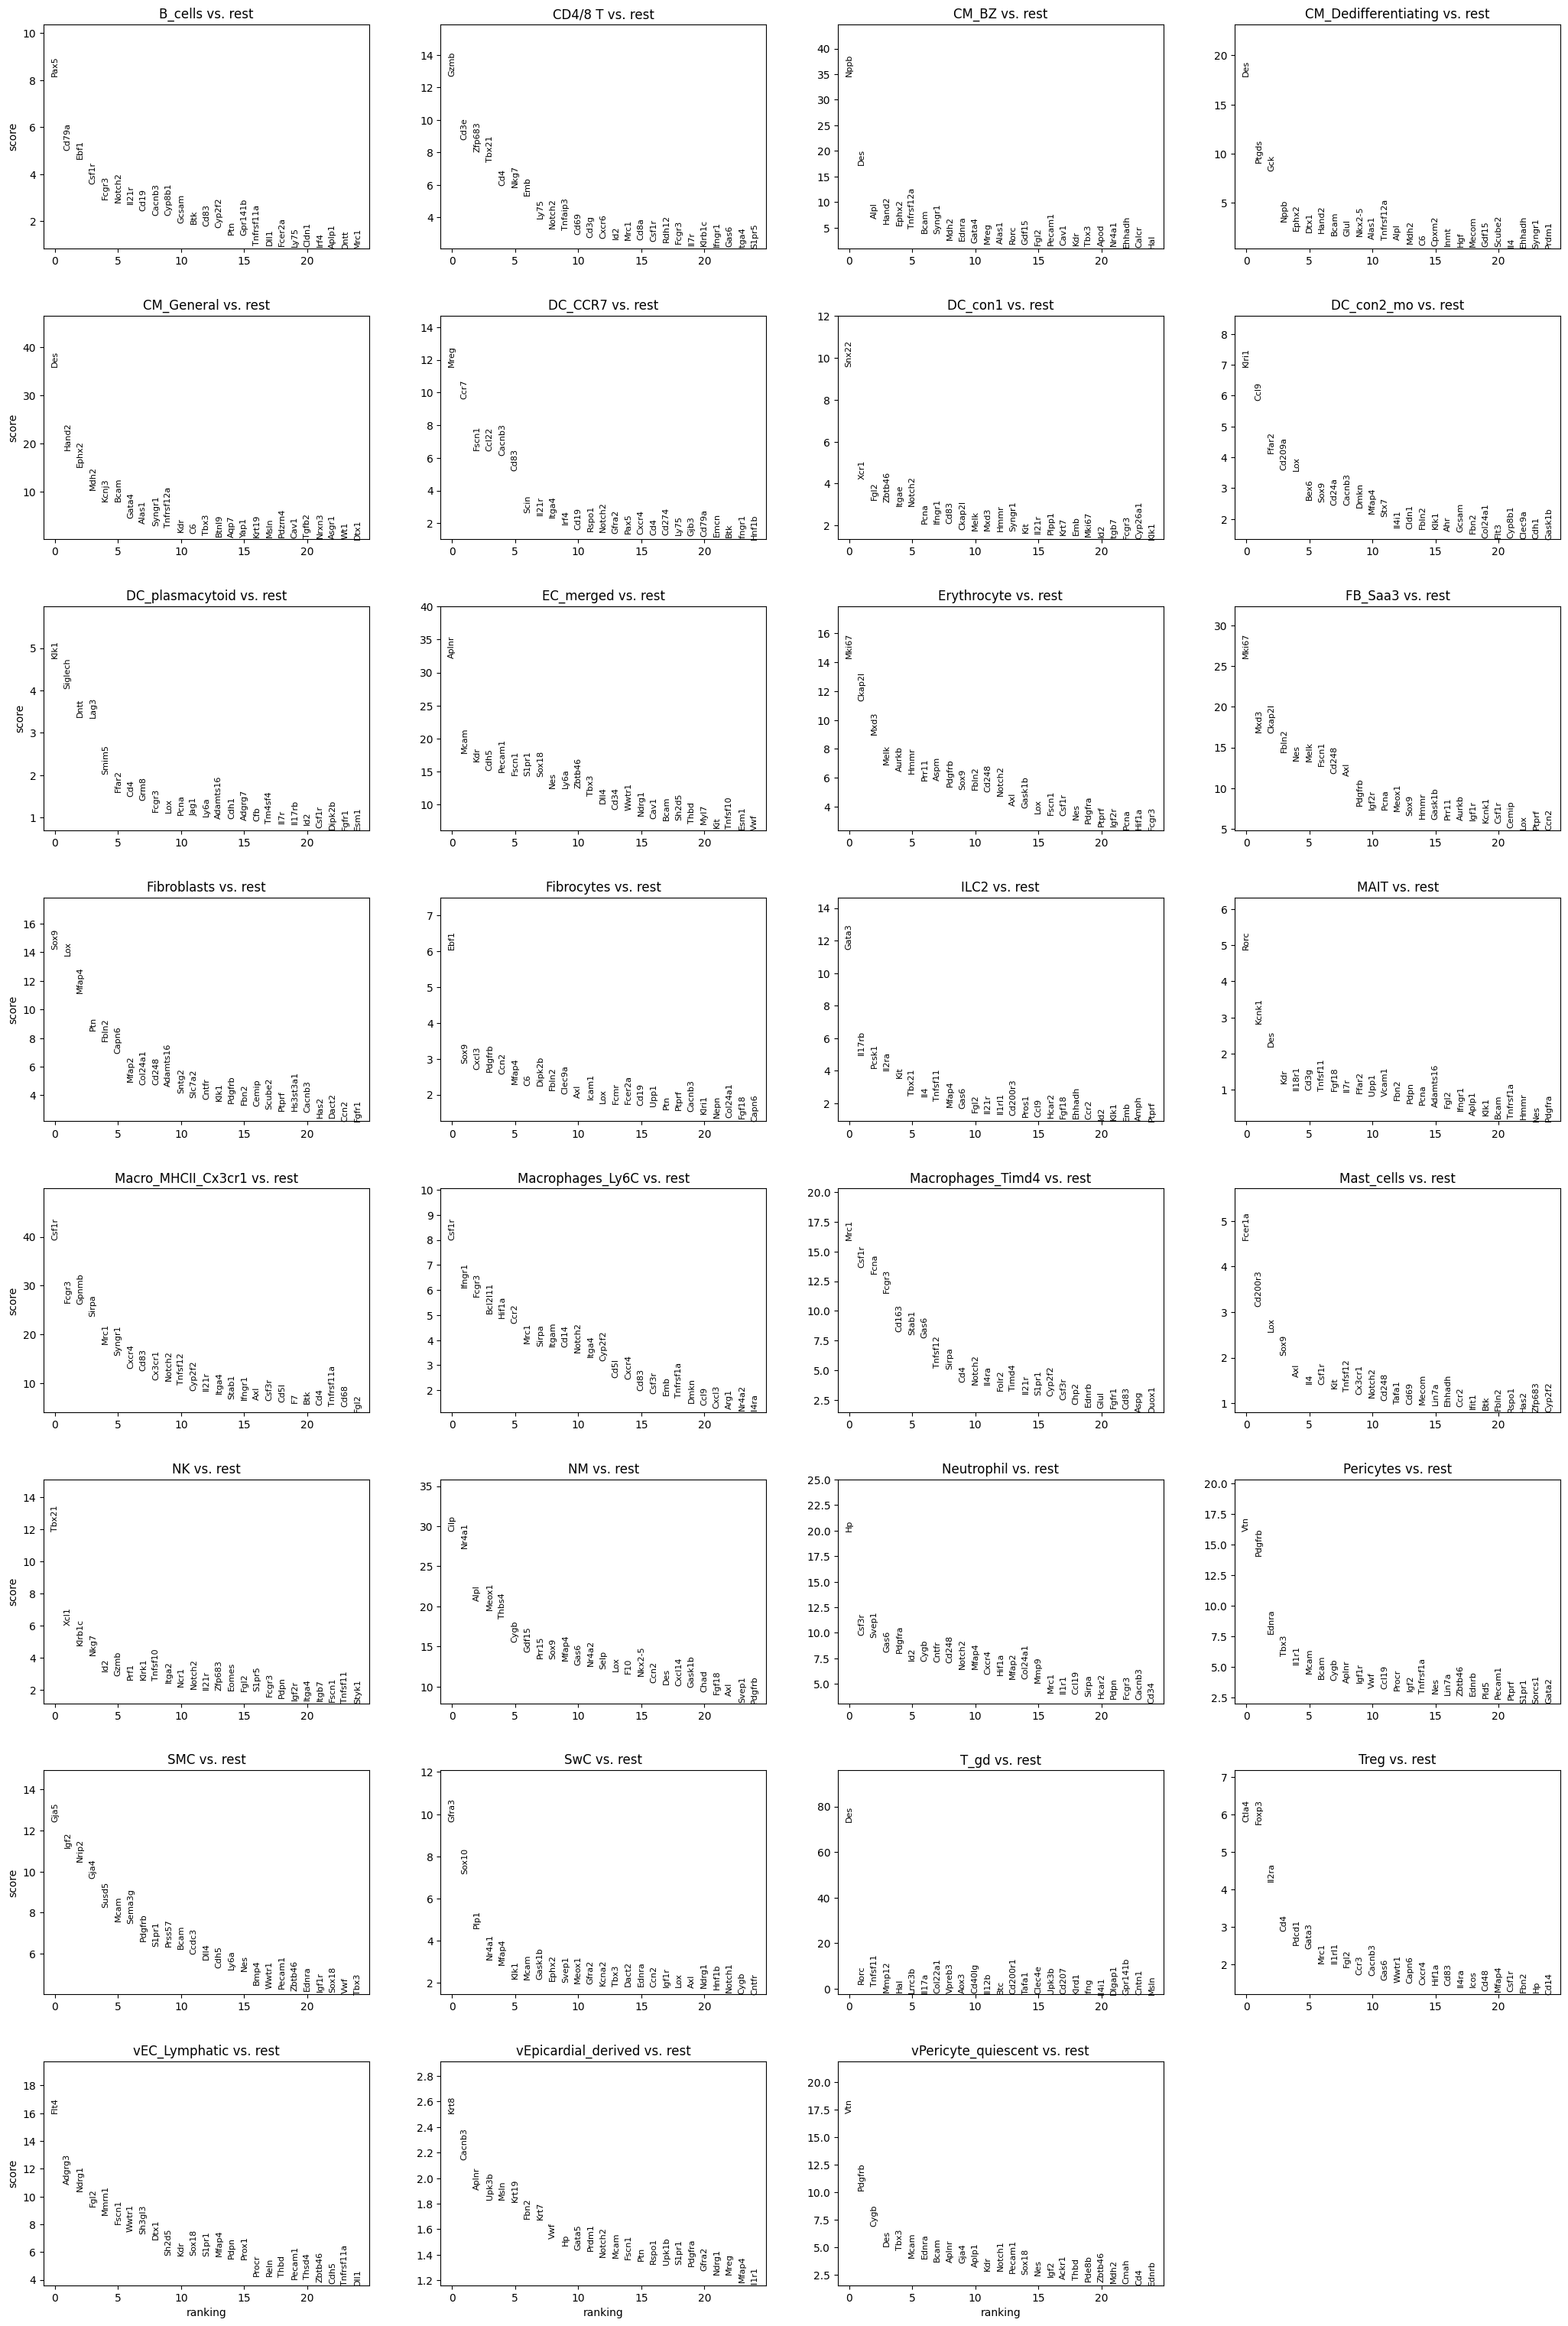

In [15]:
sc.tl.rank_genes_groups(adata, 'nico_cluster', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True, save='_t-test.png')

In [19]:
#np.sum(adata.X.todense(),axis=0)

/Users/agrawal/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

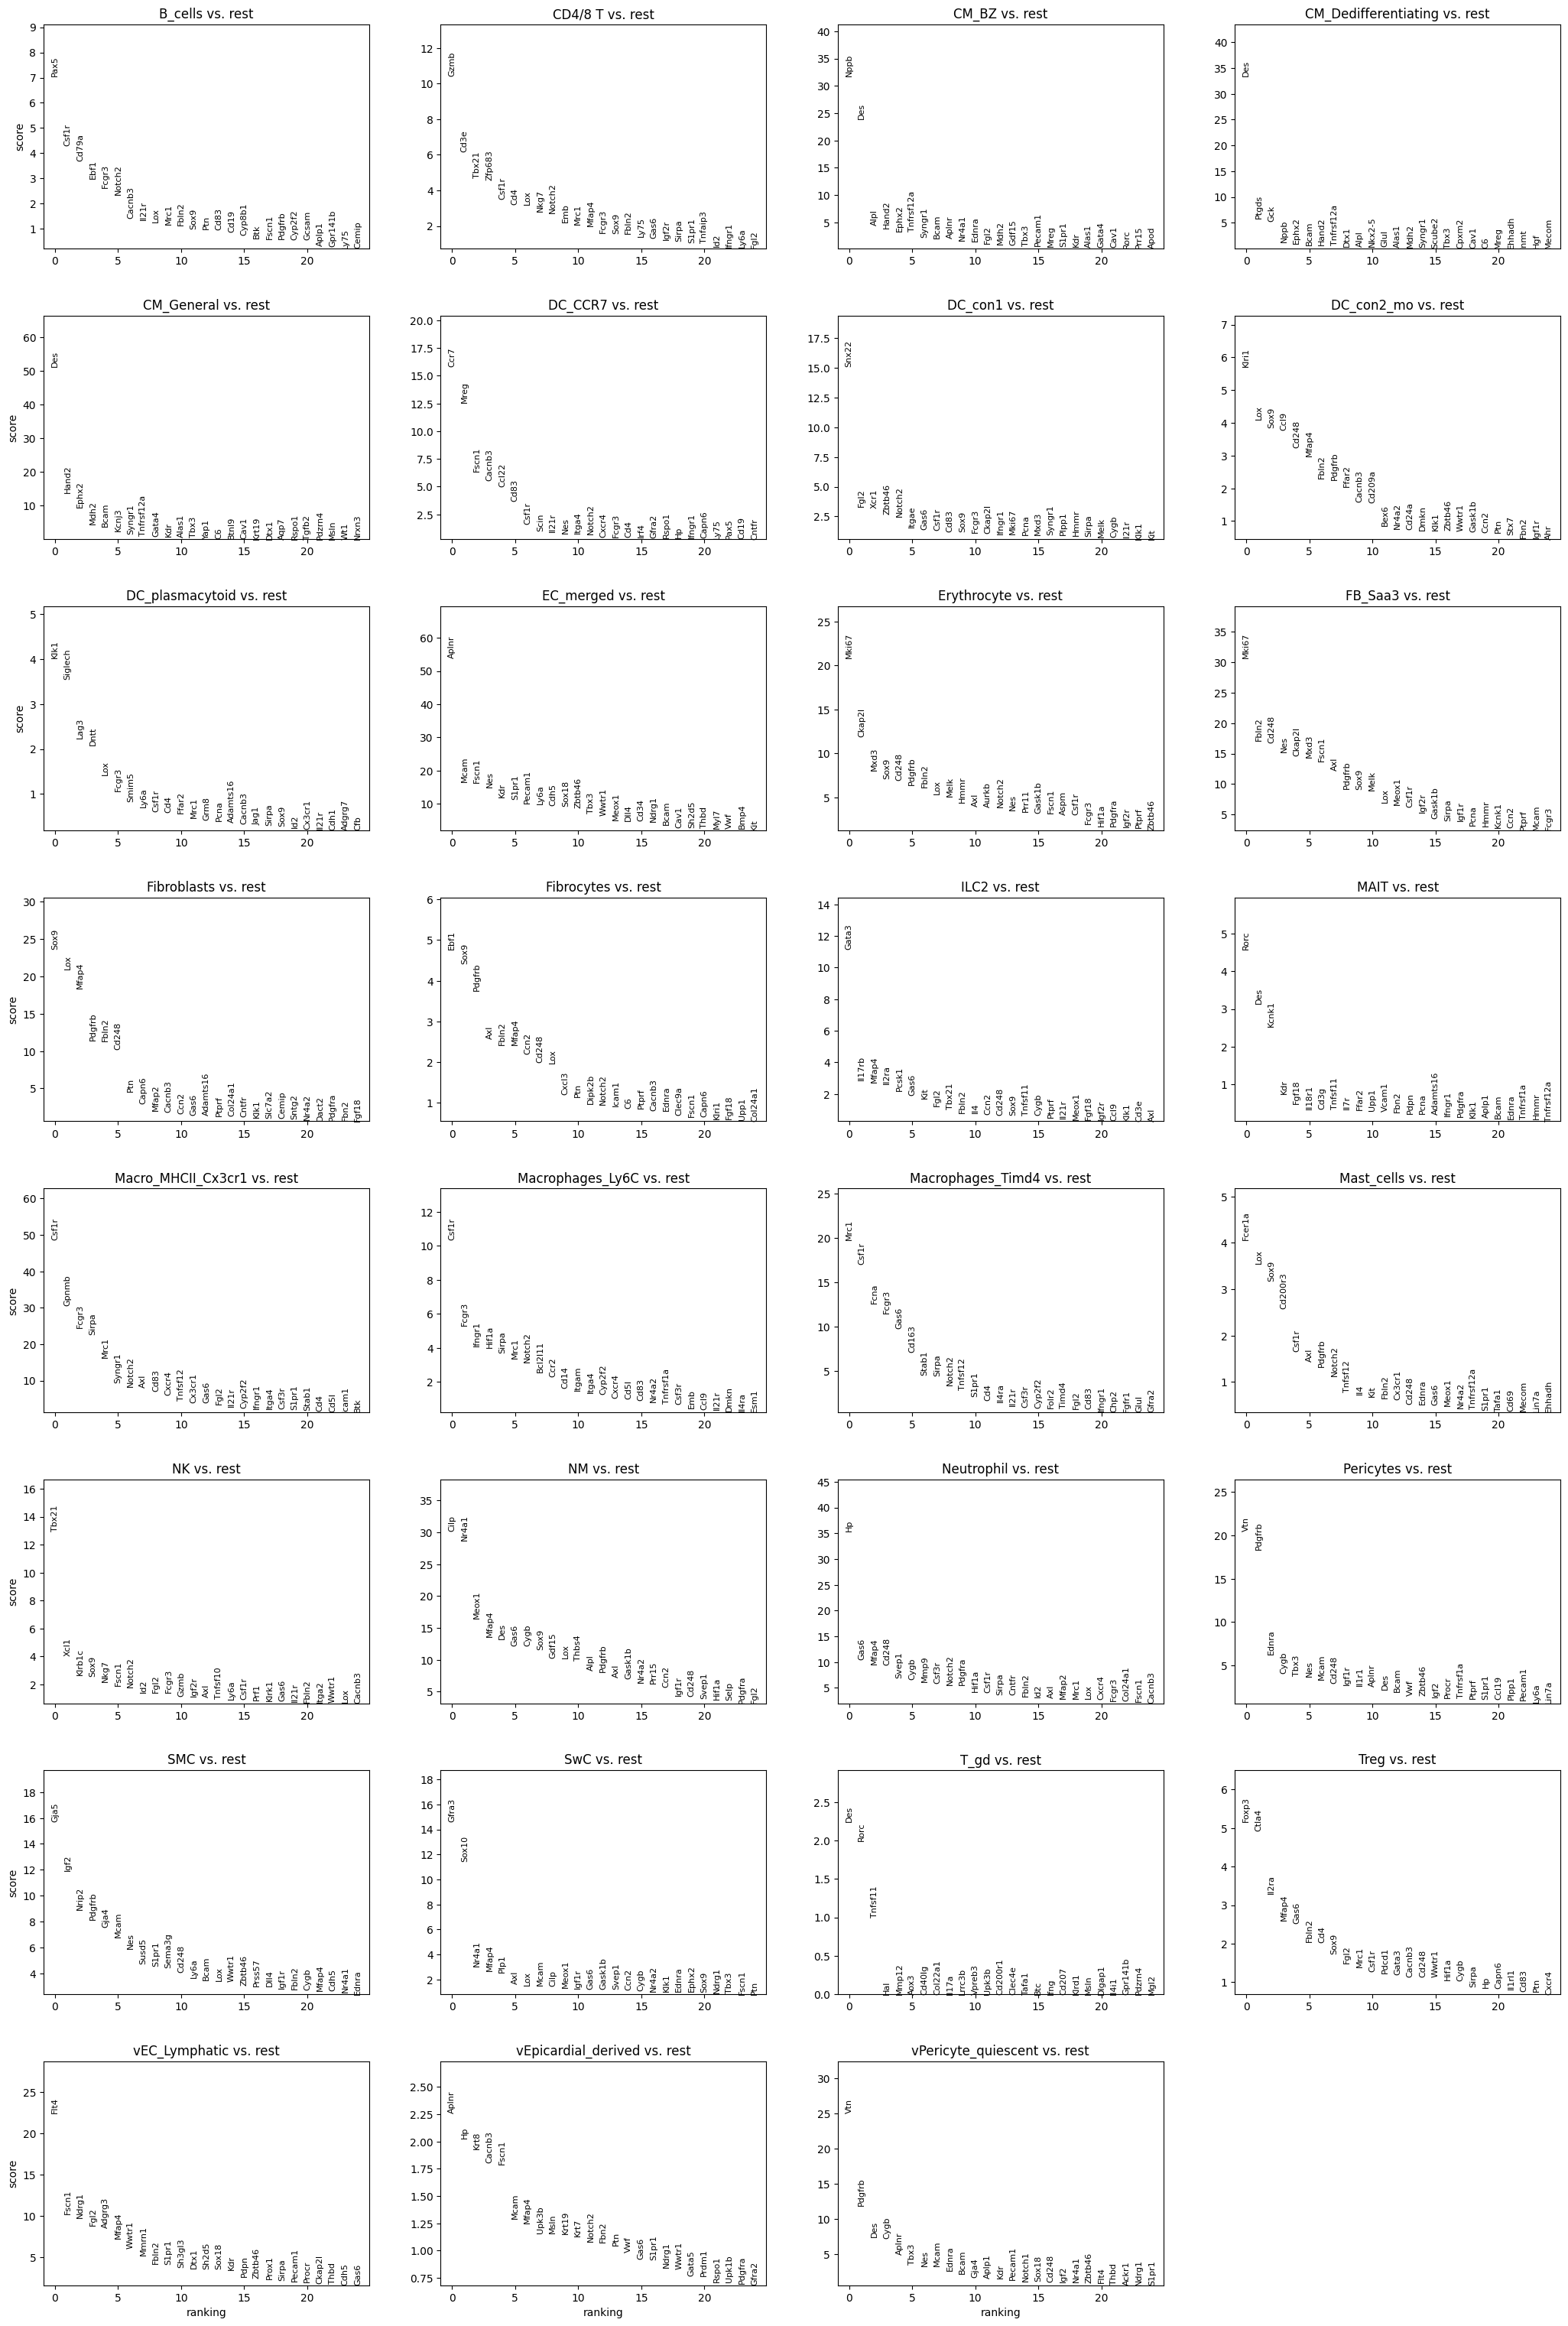

In [20]:
sc.tl.rank_genes_groups(adata, 'nico_cluster', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=True, save='_wilcoxon.png')

/Users/agrawal/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


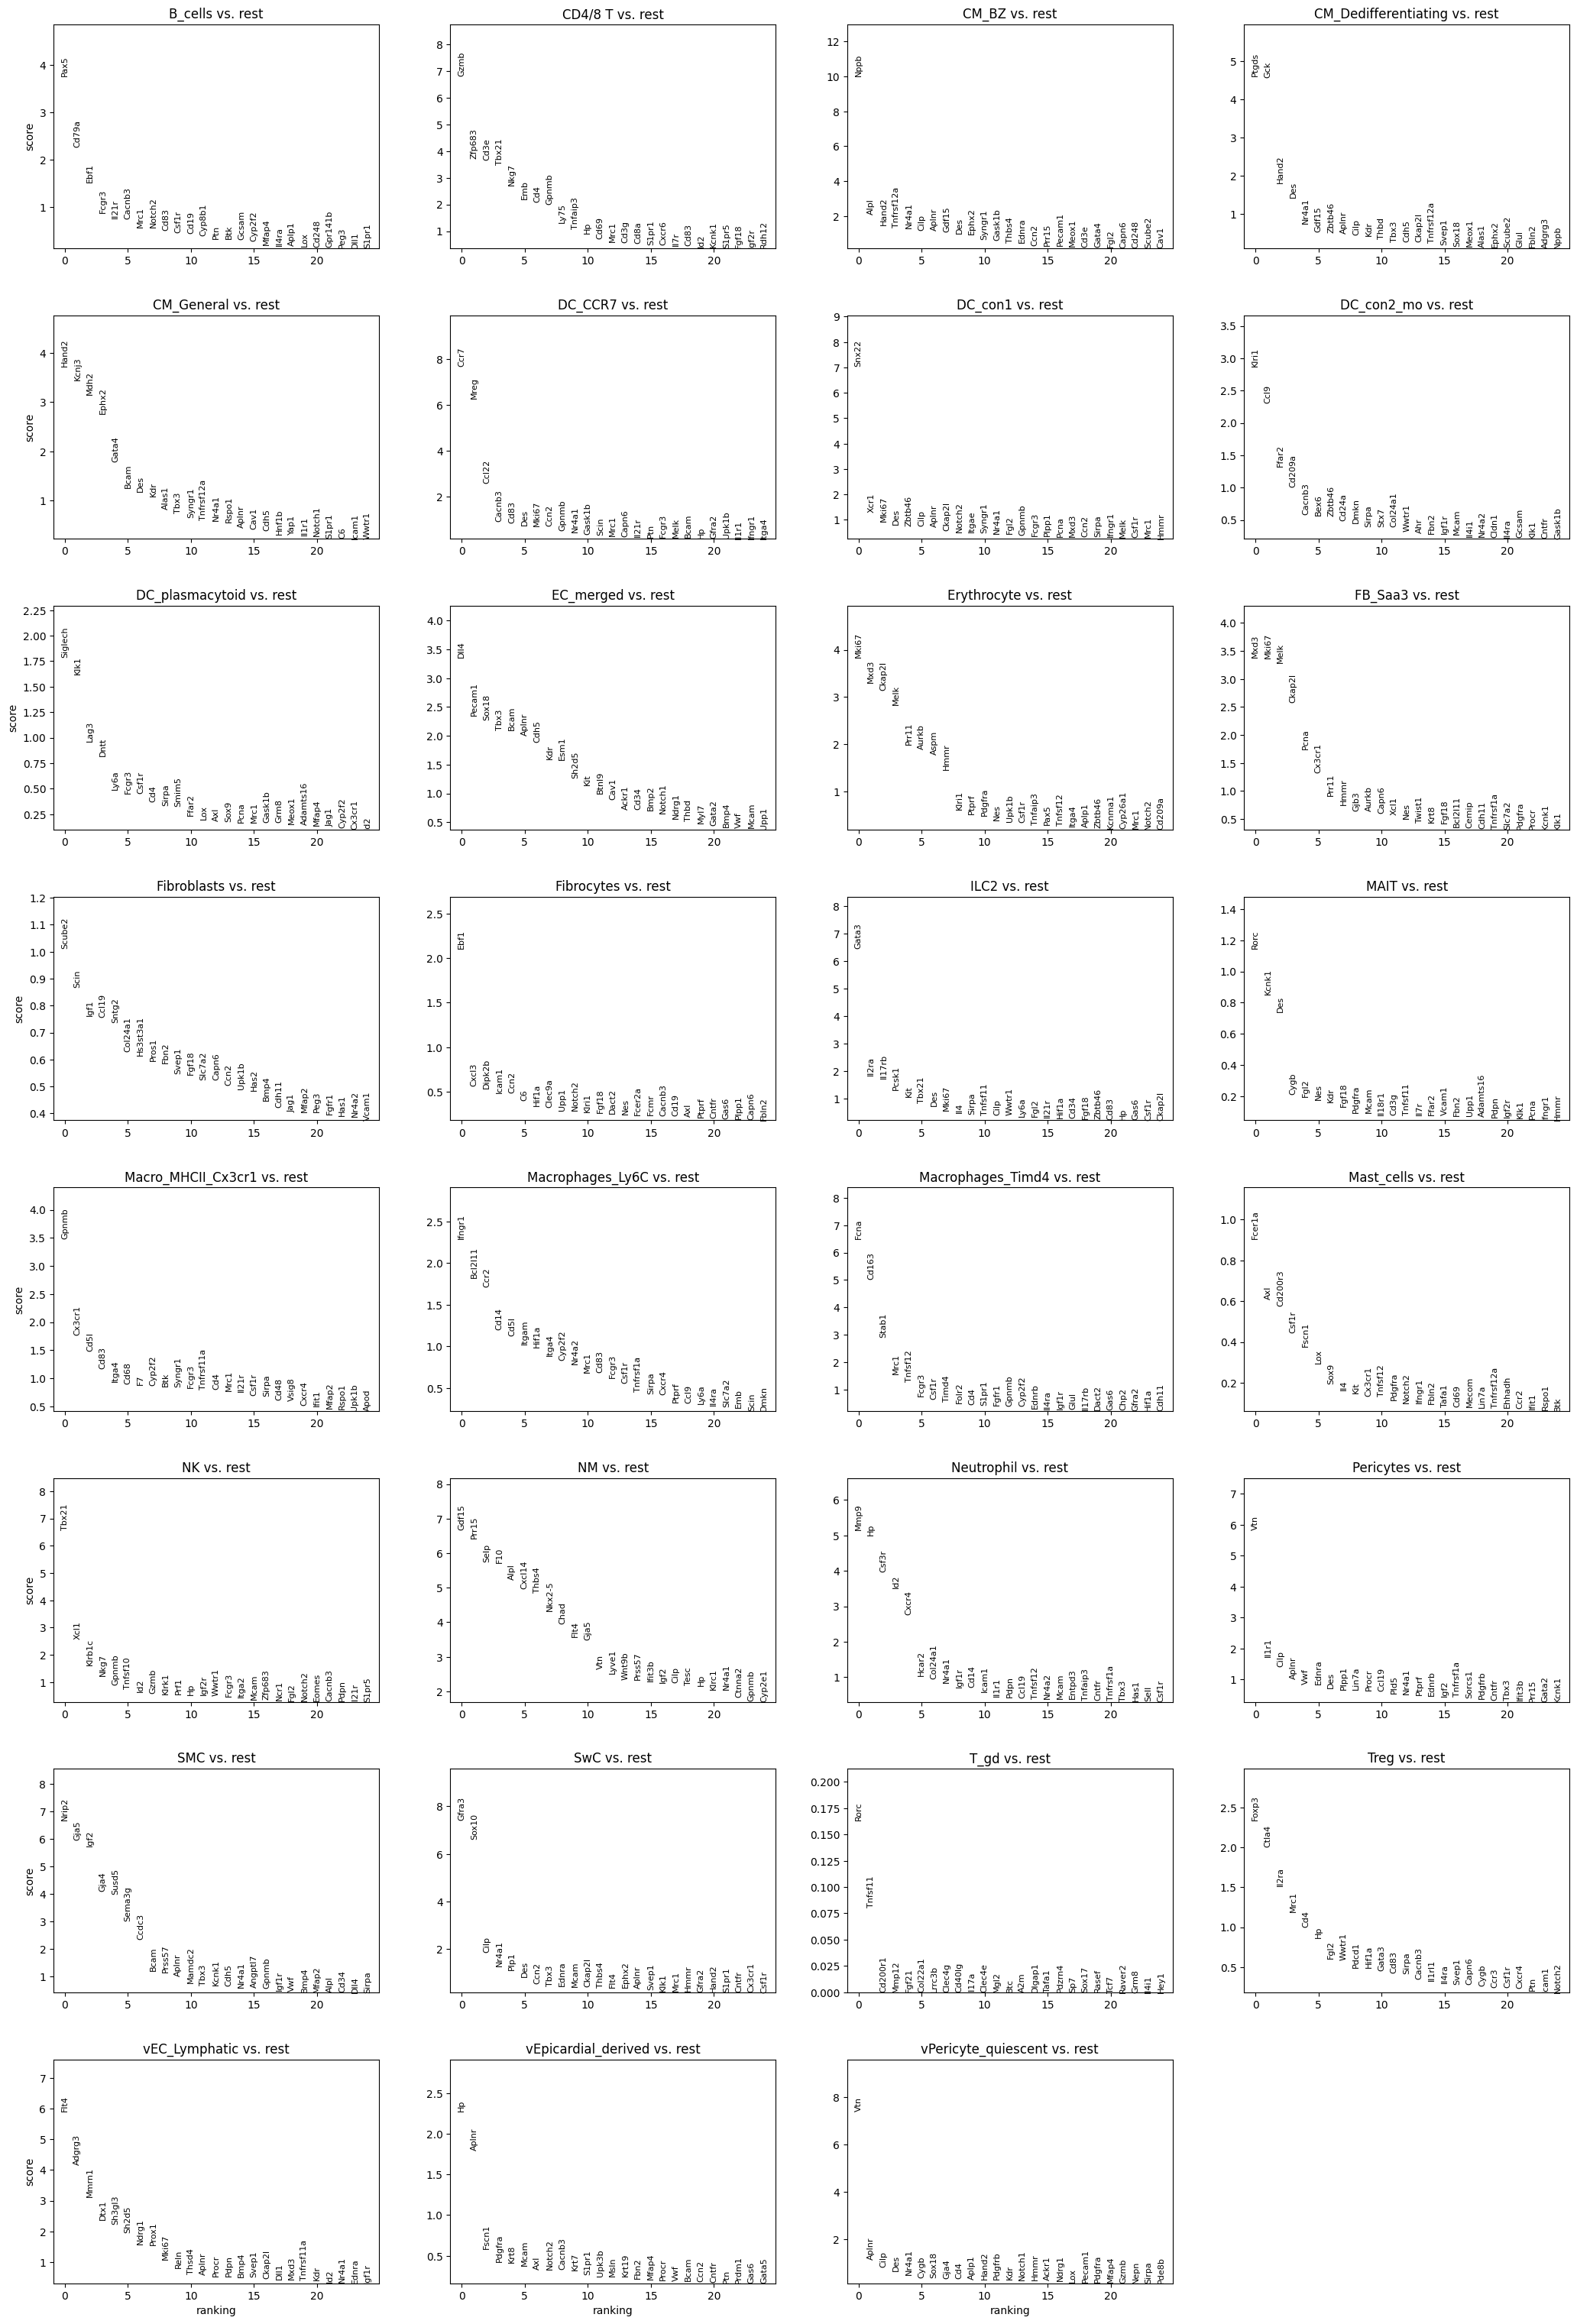

In [21]:
sc.tl.rank_genes_groups(adata, 'nico_cluster', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=True, save='_logreg.png')

In [30]:
marker_genes=['Nrip2', 'Flt4', 'Hp', 'Vtn', 'Rorc','Foxp3',
'Pax5', 'Gzmb', 'Scube2', 'Fbln2']

/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/agrawal/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


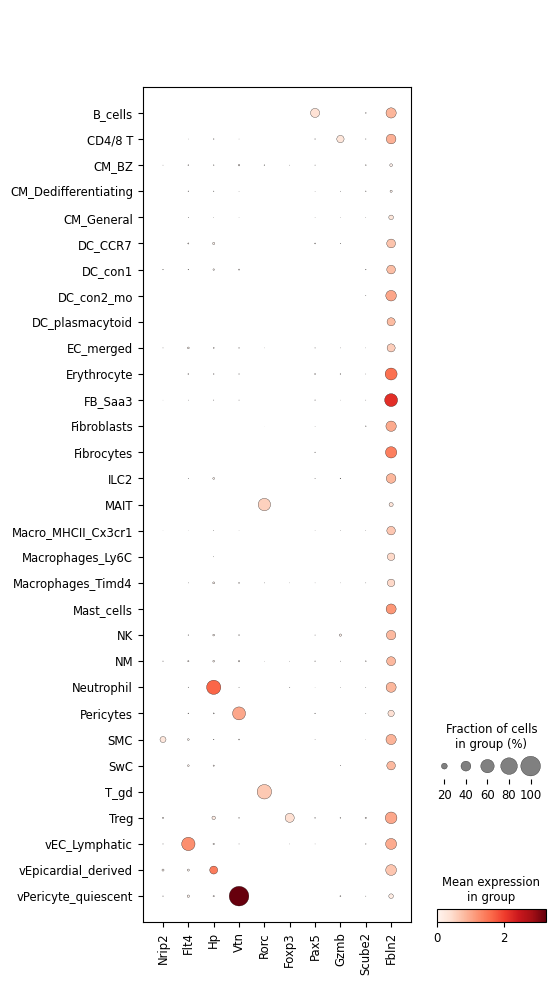

In [31]:
sc.pl.dotplot(adata, marker_genes, groupby='nico_cluster',show=True,save='_dot_plot_GM_leiden.png')


In [29]:
# all the gene names 
sorted(list(adata.var_names.to_numpy()))

['A2m',
 'A2ml1',
 'Ackr1',
 'Adamts16',
 'Adamts19',
 'Adgrg3',
 'Adgrg7',
 'Ahr',
 'Alas1',
 'Alcam',
 'Alpl',
 'Amph',
 'Angpt1',
 'Angptl7',
 'Aox3',
 'Aplnr',
 'Aplp1',
 'Apoc2',
 'Apod',
 'Aqp7',
 'Aqp8',
 'Arg1',
 'Asb4',
 'Asgr1',
 'Aspg',
 'Aspm',
 'Ass1',
 'Aurkb',
 'Axl',
 'Barx1',
 'Bcam',
 'Bche',
 'Bcl2l11',
 'Bex6',
 'Bmp2',
 'Bmp4',
 'Btc',
 'Btk',
 'Btnl9',
 'C6',
 'Cacnb3',
 'Calcr',
 'Capn6',
 'Cav1',
 'Ccdc3',
 'Ccl19',
 'Ccl22',
 'Ccl9',
 'Ccn2',
 'Ccr2',
 'Ccr3',
 'Ccr7',
 'Ccrl2',
 'Cd14',
 'Cd163',
 'Cd177',
 'Cd19',
 'Cd200r1',
 'Cd200r3',
 'Cd207',
 'Cd209a',
 'Cd248',
 'Cd24a',
 'Cd274',
 'Cd34',
 'Cd3e',
 'Cd3g',
 'Cd4',
 'Cd40lg',
 'Cd48',
 'Cd5l',
 'Cd68',
 'Cd69',
 'Cd79a',
 'Cd83',
 'Cd8a',
 'Cdh1',
 'Cdh11',
 'Cdh5',
 'Cdh6',
 'Cemip',
 'Cfb',
 'Chad',
 'Chp2',
 'Cilp',
 'Ckap2l',
 'Cldn1',
 'Cldn4',
 'Clec4e',
 'Clec4g',
 'Clec9a',
 'Cmah',
 'Cnmd',
 'Cntfr',
 'Cntn1',
 'Col22a1',
 'Col24a1',
 'Col6a6',
 'Cpxm2',
 'Crp',
 'Csf1r',
 'Csf3r',
 'Ctla4',
 